In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import pandas as pd
import os

cell_type = 'CD8T'
if cell_type == 'CD8T':
    dir_name = '5-1.CD8T_Interaction'
elif cell_type == 'Macrophage':
    dir_name = '5-2.Macrophage_Interaction'

output_directory = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/{dir_name}'
positive_gene_rank_filename = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/{dir_name}/Gene_rank.positive.csv'
negative_gene_rank_filename = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/{dir_name}/Gene_rank.negative.csv'
positive_gene_rank = pd.read_csv(positive_gene_rank_filename, index_col=0)
negative_gene_rank = pd.read_csv(negative_gene_rank_filename, index_col=0)

### 每个基因有值的样本个数条形图
用于过滤样本数过少的基因时，判断阈值的大小

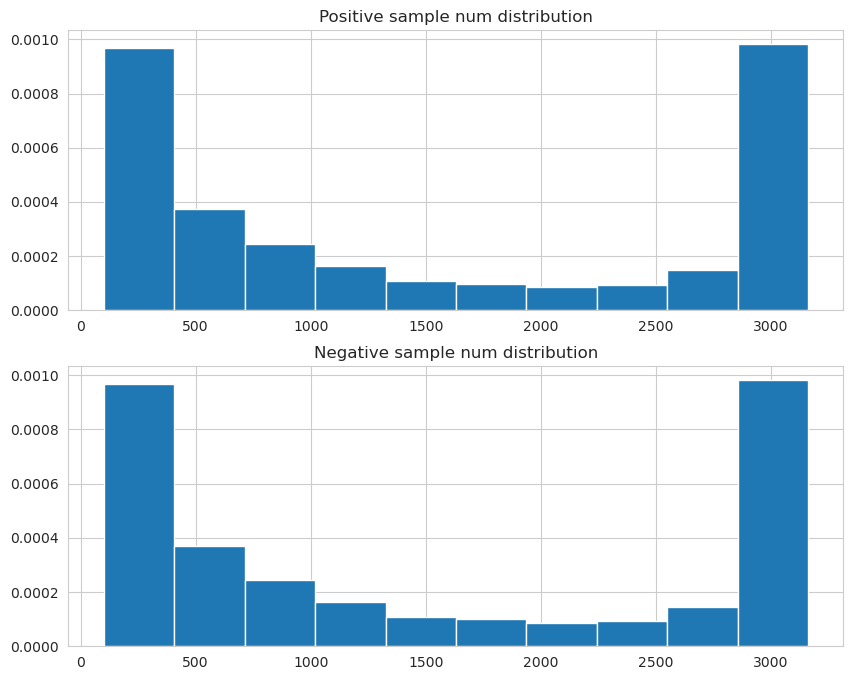

In [6]:
positive_sample_num = np.array(positive_gene_rank['SampleNum'])
negative_sample_num = np.array(negative_gene_rank['SampleNum'])

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, 0])
ax0.hist(positive_sample_num, bins=10, density=True, edgecolor='w')
# sns.kdeplot(positive_sample_num)
ax0.set_title("Positive sample num distribution")

ax1 = fig.add_subplot(gs[1, 0])
ax1.hist(negative_sample_num, bins=10, density=True, edgecolor='w')
# sns.kdeplot(negative_sample_num)
ax1.set_title("Negative sample num distribution")

fig.savefig(os.path.join(output_directory, 'SampleNum distribution.png'))
fig.show()

### 基因排序散点图

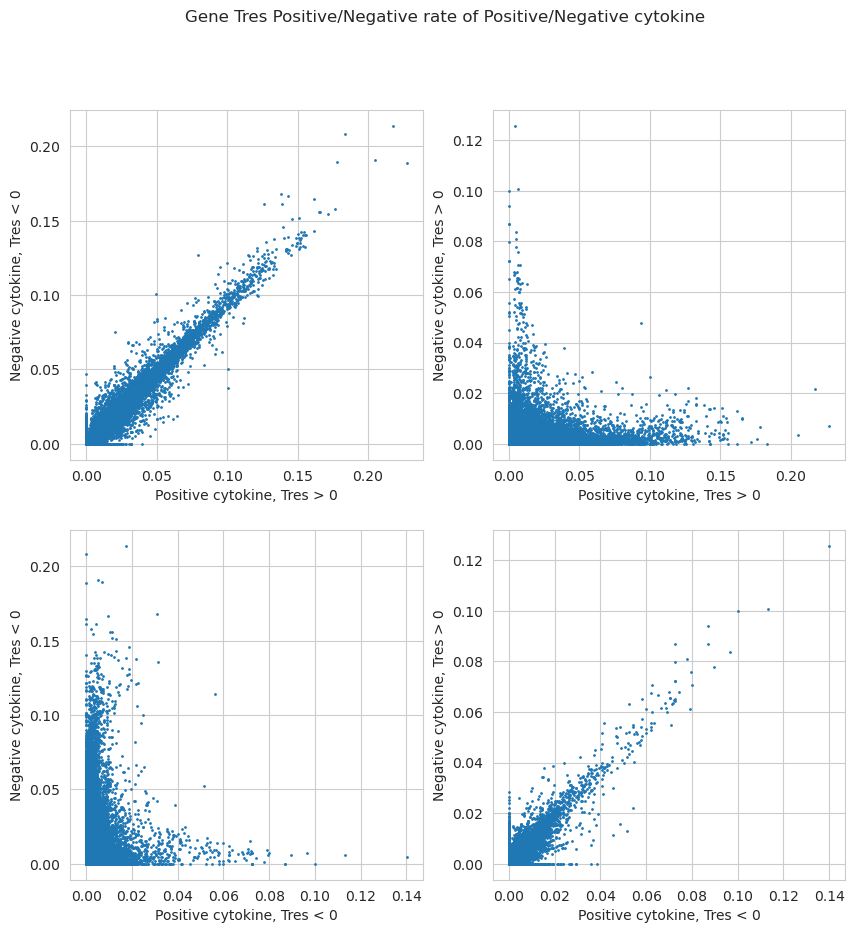

In [7]:
common_gene = positive_gene_rank.index.intersection(negative_gene_rank.index)
negative_cytokine_negative_gene = negative_gene_rank.loc[common_gene]['Rate(t<0,q<0.05)']
positive_cytokine_positive_gene = positive_gene_rank.loc[common_gene]['Rate(t>0,q<0.05)']
negative_cytokine_positive_gene = negative_gene_rank.loc[common_gene]['Rate(t>0,q<0.05)']
positive_cytokine_negative_gene = positive_gene_rank.loc[common_gene]['Rate(t<0,q<0.05)']

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1], width_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(positive_cytokine_positive_gene, negative_cytokine_negative_gene, s=1)
ax0.set_xlabel('Positive cytokine, Tres > 0')
ax0.set_ylabel('Negative cytokine, Tres < 0')

ax0 = fig.add_subplot(gs[0, 1])
ax0.scatter(positive_cytokine_positive_gene, negative_cytokine_positive_gene, s=1)
ax0.set_xlabel('Positive cytokine, Tres > 0')
ax0.set_ylabel('Negative cytokine, Tres > 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.scatter(positive_cytokine_negative_gene, negative_cytokine_negative_gene, s=1)
ax1.set_xlabel('Positive cytokine, Tres < 0')
ax1.set_ylabel('Negative cytokine, Tres < 0')

ax1 = fig.add_subplot(gs[1, 1])
ax1.scatter(positive_cytokine_negative_gene, negative_cytokine_positive_gene, s=1)
ax1.set_xlabel('Positive cytokine, Tres < 0')
ax1.set_ylabel('Negative cytokine, Tres > 0')

fig.suptitle('Gene Tres Positive/Negative rate of Positive/Negative cytokine')
fig.savefig(os.path.join(output_directory, 'Gene_tres_rate.scatter.png'))
fig.show()